<a href="https://colab.research.google.com/github/shri4916/EDA_Project_Uber/blob/main/EDA_UBER_PROJECT_Kunal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ncr_ride_bookings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read a CSV file
df = pd.read_csv('/content/ncr_ride_bookings.csv')

# View first 5 rows
(df.head())

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
df.shape

(150000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [ ]:
# monthly customers
df['Date'] = pd.to_datetime(df['Date'])

monthly = df['Date'].dt.to_period("M").value_counts().sort_index().reset_index(name='customers')
monthly.columns=['Month','Customers']
print(monthly)
monthly['Month']=monthly['Month'].astype(str)
fig=px.bar(x='Month',y='Customers',data_frame=monthly, title="Monthly customers")
fig.show()





      Month  Customers
0   2024-01      12861
1   2024-02      11927
2   2024-03      12719
3   2024-04      12199
4   2024-05      12778
5   2024-06      12440
6   2024-07      12897
7   2024-08      12636
8   2024-09      12248
9   2024-10      12651
10  2024-11      12394
11  2024-12      12250


In [ ]:
Vehicle_Type=df["Vehicle Type"].value_counts()
Vehicle_Type=pd.DataFrame(Vehicle_Type).reset_index()
Vehicle_Type.columns=["Vehicle Type","No. of times recieved customers"]
Vehicle_Type

,Vehicle Type,No. of times recieved customers
0,Auto,37419
1,Go Mini,29806
2,Go Sedan,27141
3,Bike,22517
4,Premier Sedan,18111
5,eBike,10557
6,Uber XL,4449


In [ ]:
fig=px.bar(x='Vehicle Type',y='No. of times recieved customers',data_frame=Vehicle_Type )
fig.show()

In [ ]:
pay=df['Payment Method'].value_counts()
pay=pd.DataFrame(pay).reset_index()
print(pay)
pay.columns=['Payment Method','no. of transactions']
fig=px.pie(pay,names='Payment Method',values='no. of transactions')
fig.show()

  Payment Method  count
0            UPI  45909
1           Cash  25367
2    Uber Wallet  12276
3    Credit Card  10209
4     Debit Card   8239


In [ ]:
veh=df.groupby('Vehicle Type')['Customer Rating'].mean()
veh=pd.DataFrame(veh).reset_index()
veh.columns=['Vehicle Type','Customer Rating']
print(veh)
fig=px.bar(x='Vehicle Type',y='Customer Rating',data_frame=veh)
fig.show()

    Vehicle Type  Customer Rating
0           Auto         4.402000
1           Bike         4.403940
2        Go Mini         4.404297
3       Go Sedan         4.409996
4  Premier Sedan         4.403457
5        Uber XL         4.404851
6          eBike         4.403954


In [ ]:
df['Time']=pd.to_datetime(df['Time'])
df['Hour']=df['Time'].dt.hour
hour=df['Hour'].value_counts().reset_index()
hour.columns=['Hour','Customers']
print(hour.head())


/tmp/ipython-input-4250760285.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



   Hour  Customers
0    18      12397
1    19      11047
2    17      11044
3    16       9633
4    20       9630


In [ ]:
peak_hour=hour.loc[hour['Customers'].idxmax()]
print(f"Peak Hour:{peak_hour}")


Peak Hour:Hour            18
Customers    12397
Name: 0, dtype: int64


In [ ]:
fig=px.bar(x='Hour',y='Customers',data_frame=hour, title= 'Ride per Hour')
fig.show()

In [ ]:
df['Date']=pd.to_datetime(df['Date'])  # converting object into datetime
Day=df['Date'].dt.day_name()           # to convert date in to
Day.name='Day'                         # assigning "Day" as a series name
df['Day']=Day
Day.head()

,Day
0,Saturday
1,Friday
2,Friday
3,Monday
4,Monday


In [ ]:
df.insert(1,'Day',df.pop('Day'))

In [ ]:
df.head()

,Date,Day,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,Saturday,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,Friday,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,Friday,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,Monday,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,Monday,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
total_day=df['Day'].value_counts()
total_day

,count
Day,
Monday,21644
Saturday,21542
Wednesday,21413
Sunday,21398
Friday,21397
Tuesday,21391
Thursday,21215


In [ ]:
weekdays = pd.date_range('2024-01-01','2024-12-31',freq='D').day_name().value_counts()
weekdays.columns = ['Days', 'count']
weekdays

,count
Monday,53
Tuesday,53
Wednesday,52
Thursday,52
Friday,52
Saturday,52
Sunday,52


In [ ]:
# Average booking per weekday
avg_per_day=total_day/weekdays
Avg_Booking=avg_per_day.reset_index()
Avg_Booking.columns=['DAY','Avg booking']
print(Avg_Booking)
Avg_Booking['DAY']=Avg_Booking['DAY'].astype(str)

fig=px.bar(x='DAY',y='Avg booking',data_frame=Avg_Booking, title='AVERAGE BOOKINGS PER WEEKDAYS')
fig.show()

         DAY  Avg booking
0     Friday   411.480769
1     Monday   408.377358
2   Saturday   414.269231
3     Sunday   411.500000
4   Thursday   407.980769
5    Tuesday   403.603774
6  Wednesday   411.788462


In [ ]:
from datetime import datetime , time

In [ ]:
total_bookings=len(df)

In [ ]:
d1=datetime(2024,1,1,0,0,0)
d2=datetime(2024,12,31,0,0,0)
duration=d2-d1
total_min=duration.total_seconds()/60
total_min

525600.0

In [ ]:
total_hour=total_min/60
total_hour

8760.0

### ``Freqency of booking per hour

In [ ]:
# freqency of booking per hour
freq=round(total_bookings/total_hour,2)
print("freqency of booking per hour is ",freq)

freqency of booking per hour is  17.12


Average bookings per day


In [ ]:
# avreage bookings per day
bookings=round(total_bookings/366,2)
print("avreage bookings per day are", bookings)

avreage bookings per day are 409.84


In [ ]:
import calendar

In [ ]:
calendar.isleap(2024)

True

In [ ]:
df['Date']=pd.to_datetime(df['Date'])


In [ ]:
dist_veh = df.groupby('Vehicle Type')['Ride Distance'].sum()
distance=dist_veh.reset_index()
print(distance)

fig=px.bar(x='Vehicle Type',y='Ride Distance',data_frame=distance , title="Distance travelled per vehicle")
fig.show()



    Vehicle Type  Ride Distance
0           Auto      625615.53
1           Bike      378666.33
2        Go Mini      501200.60
3       Go Sedan      450793.61
4  Premier Sedan      302936.14
5        Uber XL       74306.81
6          eBike      179456.17


### KM vs amount for vehicle type

In [ ]:
dist_veh = df.groupby('Vehicle Type')[['Ride Distance','Booking Value']].sum().reset_index()
dist_veh.set_index('Vehicle Type')

#fig=px.bar(x='Vehicle Type',y='Booking Value',data_frame=dist_veh , title="Distance travelled per vehicle")
#fig.show()



,Ride Distance,Booking Value
Vehicle Type,,
Auto,625615.53,12878422.0
Bike,378666.33,7837697.0
Go Mini,501200.60,10338496.0
Go Sedan,450793.61,9369719.0
Premier Sedan,302936.14,6275332.0
Uber XL,74306.81,1528032.0
eBike,179456.17,3618485.0


In [ ]:
incomplete_ride=df.groupby('Vehicle Type')['Incomplete Rides'].value_counts().reset_index()
incomplete_ride.columns=['Vehicle Type','count','Incomplete Rides']
print(incomplete_ride)

fig=px.bar(x='Vehicle Type',y='Incomplete Rides',data_frame=incomplete_ride)
fig.show()



    Vehicle Type  count  Incomplete Rides
0           Auto    1.0              2260
1           Bike    1.0              1328
2        Go Mini    1.0              1815
3       Go Sedan    1.0              1642
4  Premier Sedan    1.0              1063
5        Uber XL    1.0               262
6          eBike    1.0               630


/tmp/ipython-input-65566579.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




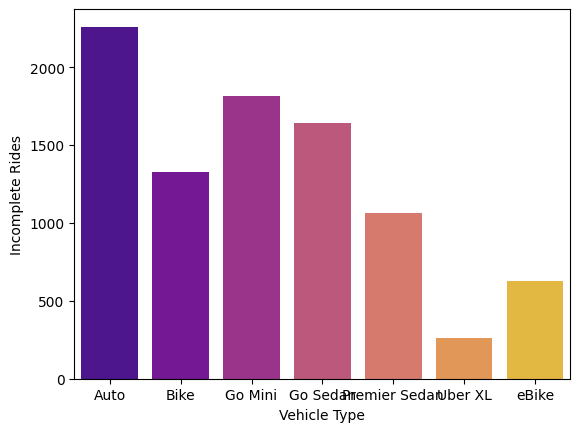

In [ ]:
fig=sns.barplot(x='Vehicle Type',y='Incomplete Rides',data=incomplete_ride,palette='plasma')

In [ ]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
